In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import gzip

os.chdir('C:\\Users\justu\\Desktop\\Bewerbungen\\Quantco interview')

In [195]:
df = pd.read_csv('predictors.csv',  encoding='latin1', sep=";", decimal=',',error_bad_lines=False)
results = pd.read_csv('results.tsv', sep='\t')

In [196]:
print(df.dtypes)
print(df.describe())
print(results.dtypes)
print(results.describe())

import datetime as dt
df.head()
df.loc[df['date_format']== '%m/%d/%Y'] 
df['date_arrange'] = df.apply(lambda x: pd.to_datetime(x['date'],format=x['date_format']),axis=1)

id               int64
bonus          float64
date            object
color           object
date_format     object
dtype: object
               id       bonus
count  400.000000  400.000000
mean   200.500000    0.291775
std    115.614301    0.117636
min      1.000000    0.020000
25%    100.750000    0.190000
50%    200.500000    0.310000
75%    300.250000    0.390000
max    400.000000    0.500000
id         int64
outcome    int64
dtype: object
               id     outcome
count  200.000000  200.000000
mean   204.625000    0.465000
std    120.297932    0.500025
min      1.000000    0.000000
25%     94.500000    0.000000
50%    205.500000    0.000000
75%    320.500000    1.000000
max    398.000000    1.000000


In [198]:
df_results= pd.merge(df, results, how='left', left_on='id',right_on='id')
df_results.set_index('id')


df_results["year"] = df_results["date_arrange"].dt.year
df_results["month"] = df_results["date_arrange"].dt.month
df_results["day"] = df_results["date_arrange"].dt.day
df_results["wday"] = df_results["date_arrange"].dt.dayofweek

In [199]:
list(df_results)
df_results.dtypes

id                       int64
bonus                  float64
date                    object
color                   object
date_format             object
date_arrange    datetime64[ns]
outcome                float64
year                     int64
month                    int64
day                      int64
wday                     int64
dtype: object

In [200]:
y_train = df_results.loc[df_results['outcome'].notna(),'outcome']
X_train = df_results.loc[df_results['outcome'].notna(),['day','month','year','bonus']]
X_test = df_results.loc[df_results['outcome'].isna(),['day','month','year','bonus']]
X_test_id = df_results.index[df_results['outcome'].isna()]

In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
rf = RandomForestRegressor(100,min_samples_split=2,max_features='sqrt')
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
np.mean((y_train - rf.predict(X_train))**2)
y_test = rf.predict(X_test)

In [203]:
y_test = pd.DataFrame(y_test,X_test_id, columns=['pred_outcome'])

In [204]:
#df_results = df_results.set_index('id')
df_results = pd.merge(df_results,y_test,how='left',left_index=True,right_index=True)

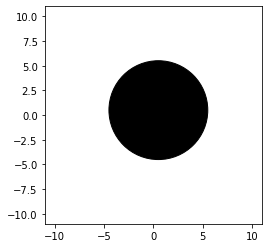

Text(0.5, 1.0, 'Simple plot')

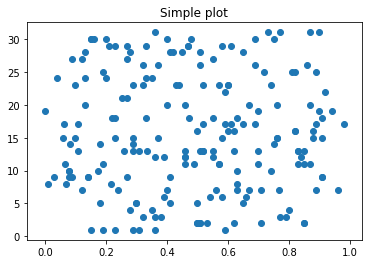

In [205]:
circle = plt.Circle((0.5,0.5),radius = 5, color='black')
fig, ax = plt.subplots()
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.axis('scaled')
ax.add_artist(circle)
plt.show()

#plt.scatter(y_test,y_train)
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.scatter(y_test, X_test['day'])
ax.set_title('Simple plot')


In [247]:
from sklearn.cluster import KMeans
df_cluster = df_results.set_index('id').loc[:,['day','month']]
for i in list(df_cluster):
    print(i)
    mean = df_cluster[i].mean()
    std = df_cluster[i].std()
    df_cluster[i+'_test'] = df_cluster.apply(lambda x: (x[i] - mean)/std, axis=1)

km = KMeans(n_clusters=2,random_state=0)
km.fit(np.array(df_cluster))
df_cluster['cluster_labels'] = km.labels_

day
month


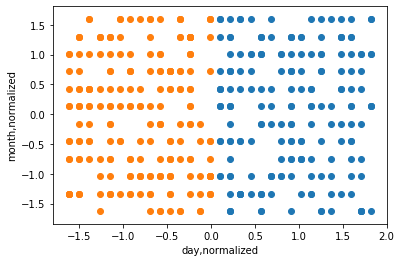

In [258]:
df_cluster
fig,ax = plt.subplots()
ax.scatter(df_cluster.loc[df_cluster['cluster_labels']==1,'day_test'],df_cluster.loc[df_cluster['cluster_labels']==1,'month_test'])
ax.scatter(df_cluster.loc[df_cluster['cluster_labels']==0,'day_test'],df_cluster.loc[df_cluster['cluster_labels']==0,'month_test'])
ax.set_xlabel('day,normalized')
ax.set_ylabel('month,normalized')
plt.show()